In [1]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use("default")
plt.style.use("ggplot")
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.coordinates import EarthLocation, SkyCoord, AltAz, get_moon, get_sun
from astropy.visualization import quantity_support, time_support, ZScaleInterval, LinearStretch, SqrtStretch, ImageNormalize
from astropy.time import Time
from astropy.table import Table

import astroplan

from skycam_utils.pipeline import get_ut, stellacam_strip_image, load_strip_image, plot_strip_image
from skycam_utils.astrometry import MMT_LOCATION

In [2]:
quantity_support()
_ = time_support()
MMT = astroplan.Observer(name="MMTO", location=MMT_LOCATION, timezone="US/Arizona", pressure=0*u.mbar)
#%matplotlib widget

In [3]:
ref = fits.open("/mnt/d/sky_brightness/old_skycam/20191005/image_0001503.fits.gz")[0].data
test = fits.open("/mnt/d/sky_brightness/old_skycam/20191005/image_0001395.fits.gz")[0].data
ref[:, 319].mean() / test[:, 319].mean()

0.9196901030458009

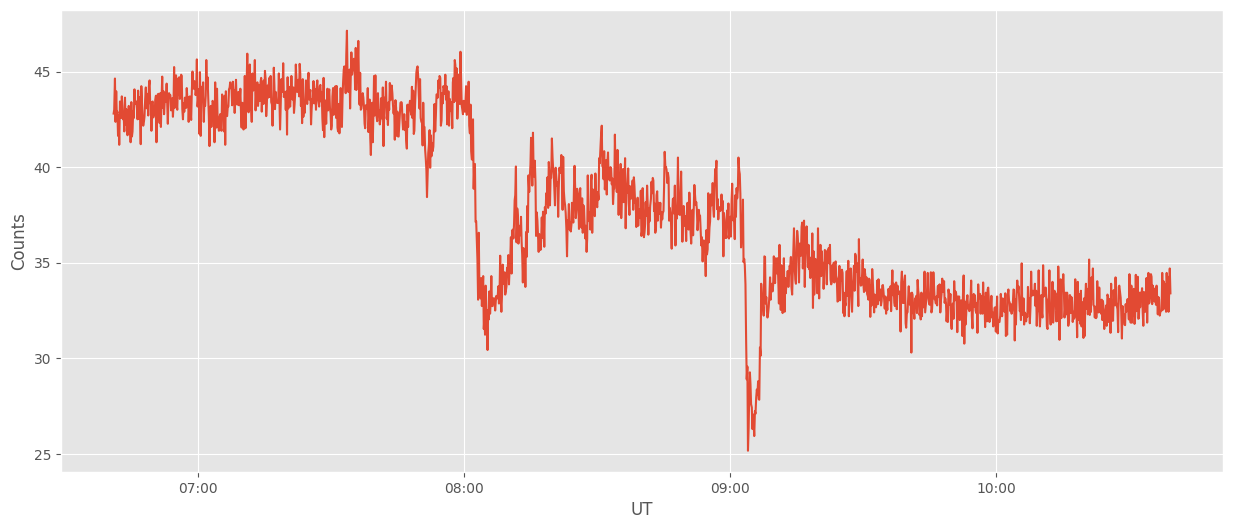

In [4]:
june, june_ut = load_strip_image("/mnt/d/sky_brightness/old_skycam/strip_20190606.fits")
arr = np.ma.array(june[5:35, :].data.mean(axis=0), mask=june[20, :].mask)
plt.figure(figsize=(15, 6))
plt.plot(june_ut, arr)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.xlabel("UT")
plt.ylabel("Counts")
plt.show()

In [5]:
oct, oct_ut = load_strip_image("/mnt/d/sky_brightness/old_skycam/strip_20191005.fits")


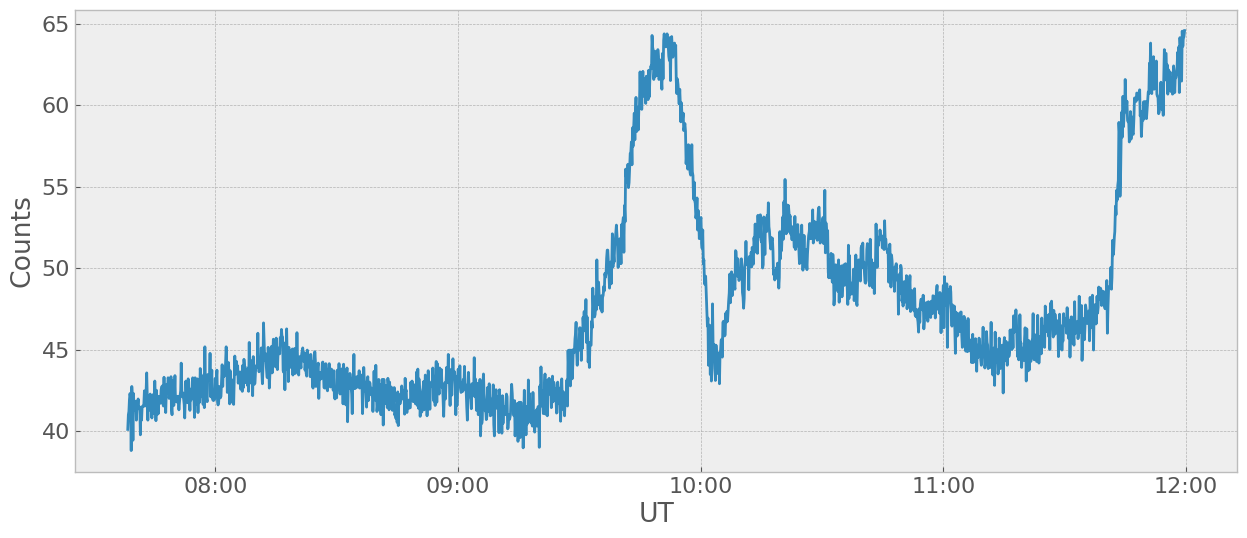

In [6]:
with plt.style.context('bmh'):
    plt.rcParams['font.size'] = 16
    arr = np.ma.array(oct[5:35, :].data.mean(axis=0), mask=oct[20, :].mask)
    plt.figure(figsize=(15, 6))
    plt.plot(oct_ut, arr)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.xlabel("UT")
    plt.ylabel("Counts")
    plt.show()

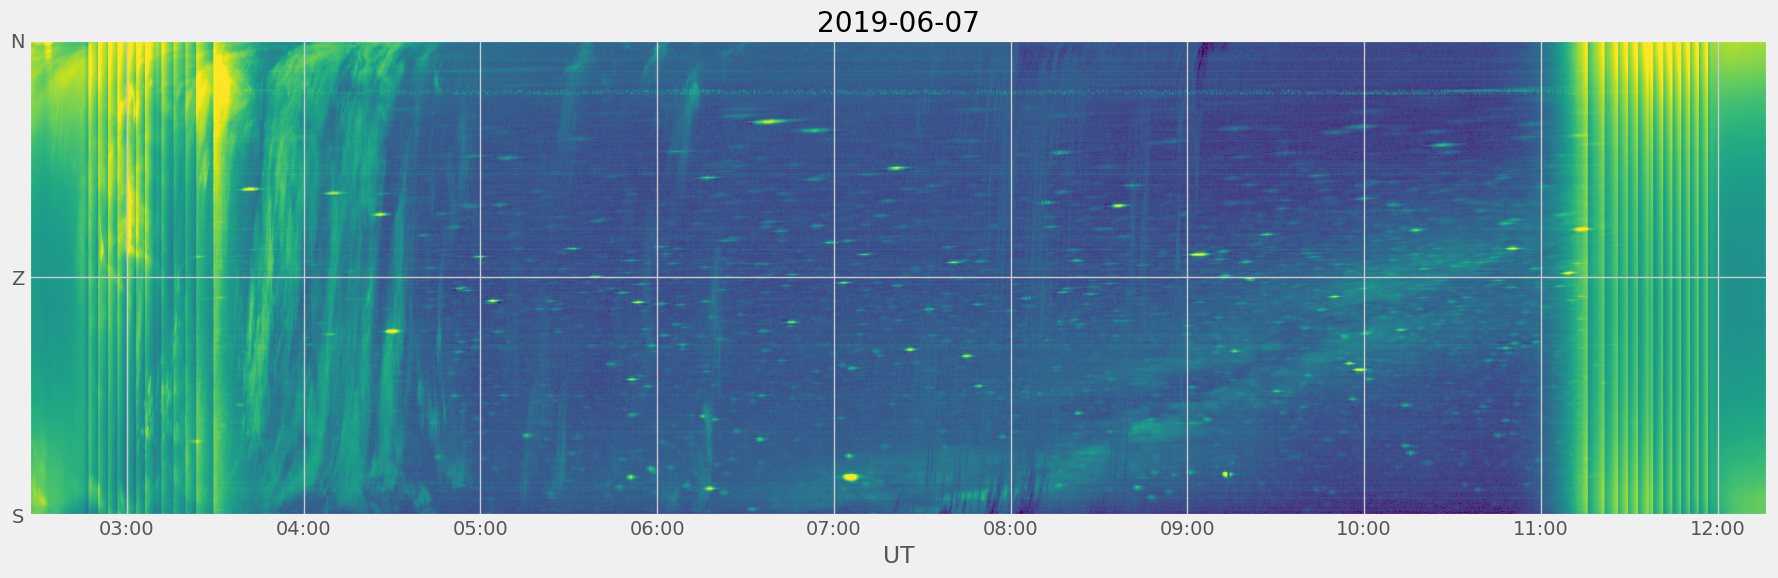

In [7]:
with plt.style.context('fivethirtyeight'):
    fig = plot_strip_image("/mnt/d/sky_brightness/old_skycam/strip_20190606.fits", masked=False)
    plt.tight_layout()
    plt.savefig("../draft_figures/strip_20190606.pdf")
    plt.show()

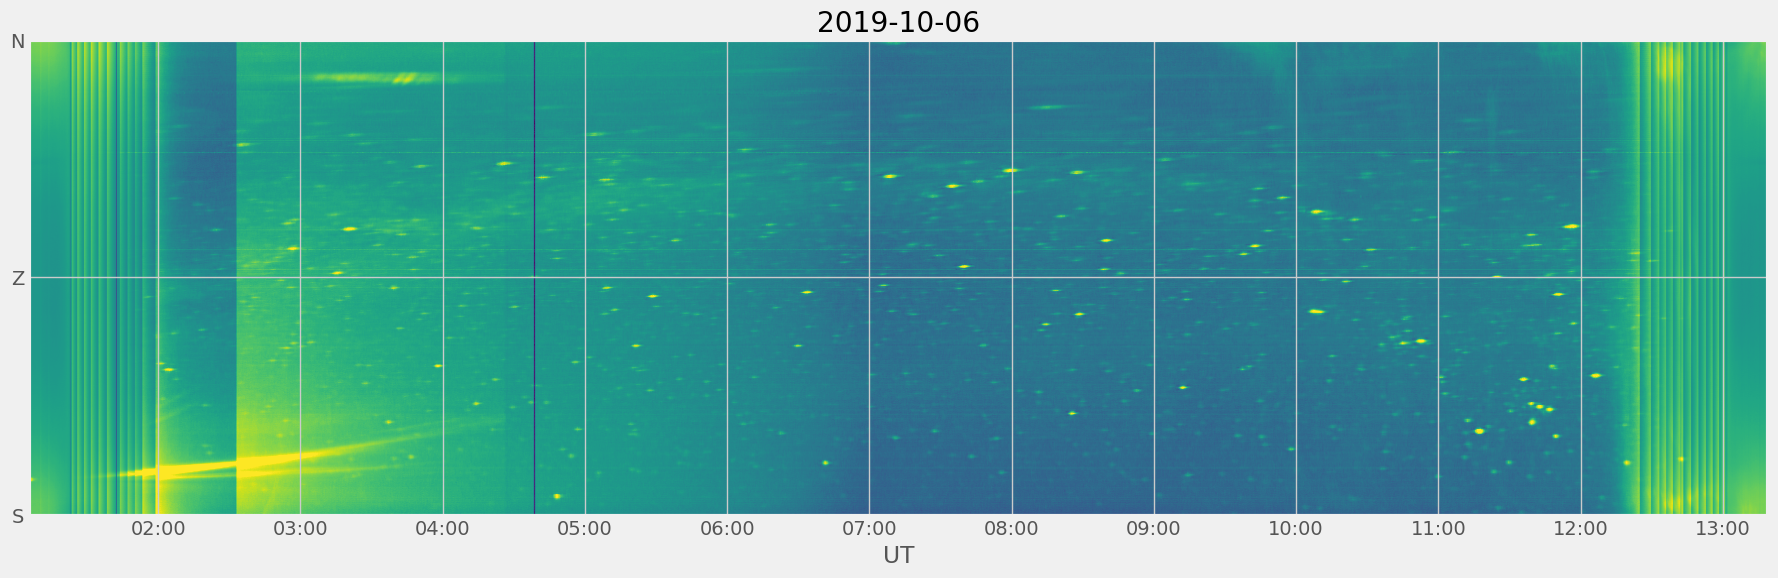

In [8]:
with plt.style.context('fivethirtyeight'):
    fig = plot_strip_image("/mnt/d/sky_brightness/old_skycam/strip_20191005.fits", masked=False)
    plt.tight_layout()
    plt.savefig("../draft_figures/strip_20191005.pdf")
    plt.show()

In [23]:
rootdir = Path("/mnt/d/sky_brightness/old_skycam/20191005")
fitsfiles = rootdir.glob("image_*.fits.gz")
with open(rootdir / "files.csv", 'w') as fp:
    fp.write("file,ut\n")
    for f in fitsfiles:
        with fits.open(f) as hdul:
            ut = get_ut(hdul[0].header)
            fp.write(f"{f},{ut.isot}\n")

In [13]:
oct_skycam = Path("/mnt/d/sky_brightness/old_skycam/20191005")
jun_skycam = Path("/mnt/d/sky_brightness/old_skycam/20190606")
ut = get_ut(fits.open(oct_skycam / "image_0001753.fits.gz")[0].header)
ut.to_datetime()

datetime.datetime(2019, 10, 6, 5, 15, 10)

In [22]:
oct_skycam = Path("/mnt/d/sky_brightness/old_skycam/20191005")
jun_skycam = Path("/mnt/d/sky_brightness/old_skycam/20190606")
def get_nearest_images(t, n=10, csvdir=jun_skycam):
    df = pd.read_csv(csvdir / "files.csv")
    df = df.set_index(pd.DatetimeIndex(df['ut'], name='time'))
    idx = df.index.get_loc(t.to_datetime(), method='nearest')
    idxs = range(idx-n, idx+n+1)
    files = [df['file'][i] for i in idxs]
    return files


In [23]:
get_nearest_images(ut, csvdir=oct_skycam)

['/mnt/d/sky_brightness/old_skycam/20191005/image_0001743.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001744.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001745.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001746.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001747.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001748.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001749.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001750.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001751.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001752.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001753.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001754.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001755.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/image_0001756.fits.gz',
 '/mnt/d/sky_brightness/old_skycam/20191005/imag